[*********************100%***********************]  1 of 1 completed


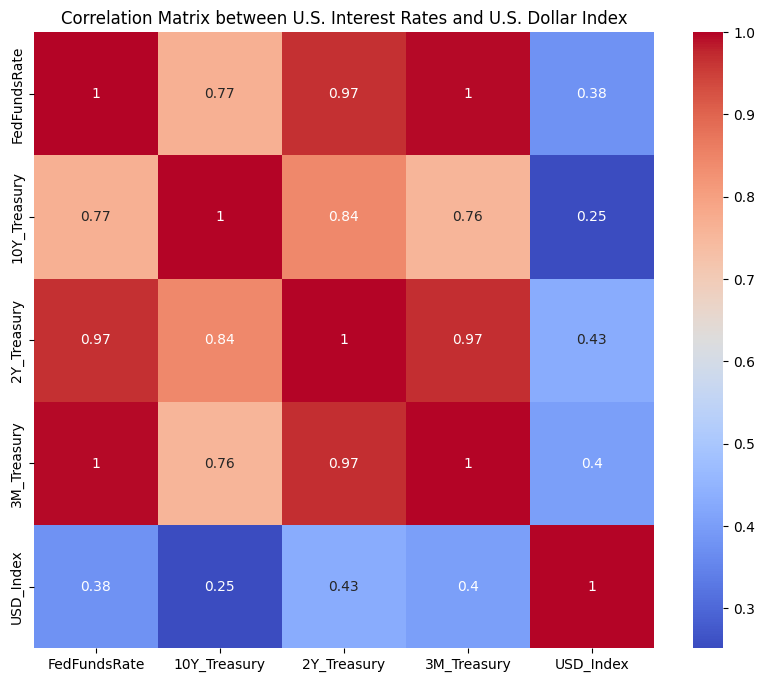

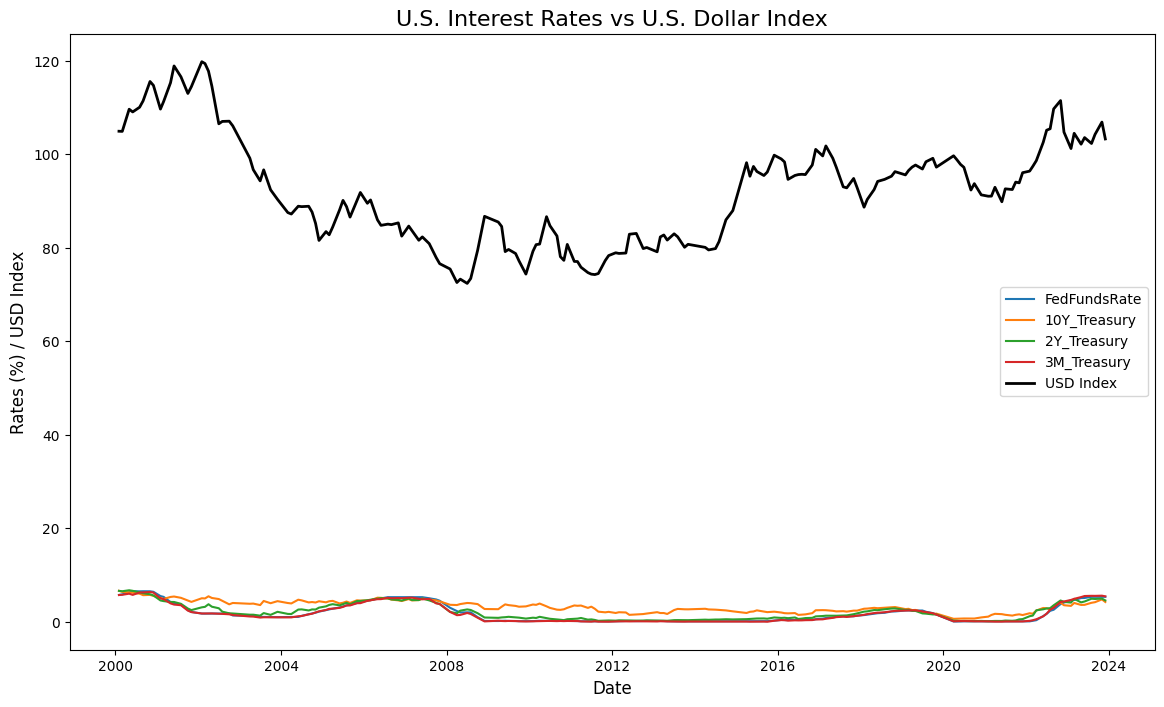

Granger Causality Test between FedFundsRate and USD Index

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0512  , p=0.8213  , df_denom=182, df_num=1
ssr based chi2 test:   chi2=0.0520  , p=0.8196  , df=1
likelihood ratio test: chi2=0.0520  , p=0.8196  , df=1
parameter F test:         F=0.0512  , p=0.8213  , df_denom=182, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1679  , p=0.8456  , df_denom=179, df_num=2
ssr based chi2 test:   chi2=0.3452  , p=0.8415  , df=2
likelihood ratio test: chi2=0.3449  , p=0.8416  , df=2
parameter F test:         F=0.1679  , p=0.8456  , df_denom=179, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0948  , p=0.9628  , df_denom=176, df_num=3
ssr based chi2 test:   chi2=0.2959  , p=0.9608  , df=3
likelihood ratio test: chi2=0.2956  , p=0.9609  , df=3
parameter F test:         F=0.0948  , p=0.9628  , df_denom=176, df_num=3

Granger Causality
number of lags (n

C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\nilee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Mean Squared Error: 89.4483880930822
              Coefficient
FedFundsRate   -12.533244
10Y_Treasury    -4.131327
2Y_Treasury      8.636040
3M_Treasury      9.565654


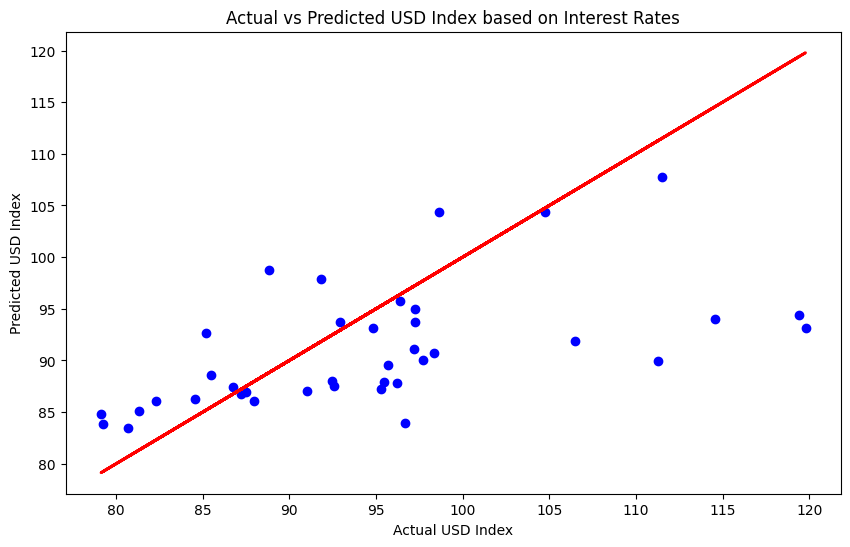

In [1]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

# Initialize FRED API
fred_api_key = 'Enter Your Key'
fred = Fred(api_key=fred_api_key)

# Fetch U.S. interest rate data from FRED
interest_rates = {
    'FedFundsRate': 'FEDFUNDS',           # Federal Funds Rate
    '10Y_Treasury': 'DGS10',              # 10-Year Treasury Yield
    '2Y_Treasury': 'DGS2',                # 2-Year Treasury Yield
    '3M_Treasury': 'DGS3MO'               # 3-Month Treasury Yield
}

# Fetch U.S. Dollar Index data from yfinance
start_date = '2000-01-01'
end_date = '2024-01-01'
usd_index = yf.download('DX-Y.NYB', start=start_date, end=end_date)

# Fetch data for interest rates
rates_data = pd.DataFrame()
for key, fred_id in interest_rates.items():
    rates_data[key] = fred.get_series(fred_id, start=start_date, end=end_date)

# Combine the data into a single DataFrame
rates_data['USD_Index'] = usd_index['Close']

# Data preprocessing (handle missing values, normalization, etc.)
rates_data = rates_data.dropna()

# Step 1: Correlation Analysis
correlation_matrix = rates_data.corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between U.S. Interest Rates and U.S. Dollar Index')
plt.show()

# Step 2: Visualize Time Series
plt.figure(figsize=(14, 8))
for rate in interest_rates.keys():
    plt.plot(rates_data.index, rates_data[rate], label=rate)
plt.plot(rates_data.index, rates_data['USD_Index'], label='USD Index', color='black', linewidth=2)
plt.title('U.S. Interest Rates vs U.S. Dollar Index', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rates (%) / USD Index', fontsize=12)
plt.legend()
plt.show()

# Step 3: Granger Causality Test
# This tests if changes in interest rates can predict future changes in the USD Index
max_lag = 12  # Test with a 12-month lag
for rate in interest_rates.keys():
    print(f"Granger Causality Test between {rate} and USD Index")
    result = grangercausalitytests(rates_data[['USD_Index', rate]], max_lag, verbose=True)

# Step 4: Regression Analysis
# Set up for regression: Use interest rates to predict USD Index
X = rates_data[interest_rates.keys()]
y = rates_data['USD_Index']

# Split into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted USD Index based on Interest Rates')
plt.xlabel('Actual USD Index')
plt.ylabel('Predicted USD Index')
plt.show()
